Example to show how to plot spectrum of Fermi/LAT sources

https://github.com/gammapy/gammapy/blob/master/examples/example_fermi_catalogs.py

In [9]:
# import matplotlib.pyplot as plt

# from gammapy.catalog import SourceCatalog3FGL, SourceCatalog2FHL, SourceCatalog1FHL, SourceCatalog3FHL
# from gammapy.utils.energy import EnergyBounds

In [10]:
# name = 'PKS 2155-304'

In [11]:
# # load catalogs
# fermi_3fgl = SourceCatalog3FGL()
# fermi_2fhl = SourceCatalog2FHL()
# fermi_1fhl = SourceCatalog1FHL()
# # fermi_3fhl = SourceCatalog3FHL()

In [12]:
# # access crab data by corresponding identifier
# src_3fgl = fermi_3fgl[name]
# src_2fhl = fermi_2fhl[name]
# src_1fhl = fermi_1fhl[name]
# # src_3fhl = fermi_3fhl[name]

In [13]:
# # 3FGL
# ax = src_3fgl.spectral_model.plot(src_3fgl.energy_range, energy_power=2,
#                                   label='Fermi 3FGL', color='r',
#                                   flux_unit='erg-1 cm-2 s-1')

# src_3fgl.spectral_model.plot_error(src_3fgl.energy_range, ax=ax, energy_power=2,
#                                   facecolor='r', flux_unit='erg-1 cm-2 s-1')

# src_3fgl.flux_points.plot(ax=ax, sed_type='eflux', color='r',
#                           flux_unit='erg cm-2 s-1')

TRYING AGAIN - using same method from my other jupyter notebook, for all Fermi data.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pprint import pprint
import astropy.units as u
from astropy.units import Quantity

In [2]:
from gammapy.catalog import SourceCatalog3FGL, SourceCatalog2FHL, SourceCatalog1FHL

cat_3fgl = SourceCatalog3FGL()
cat_2fhl = SourceCatalog2FHL()
cat_1fhl = SourceCatalog1FHL()

name = 'PKS 2155-304'

source_3fgl = cat_3fgl[name]
source_2fhl = cat_2fhl[name]
source_1fhl = cat_1fhl[name]

data_3fgl = source_3fgl.flux_points.table
data_2fhl = source_2fhl.flux_points.table
data_1fhl = source_1fhl.flux_points.table

# Create flux error
def getError(data):
    return (data['dnde'] * (data['flux_errn'] / data['flux'])).to(data['dnde'].unit)

data_3fgl['dnde_err'] = getError(data_3fgl)
data_2fhl['dnde_err'] = getError(data_2fhl)
data_1fhl['dnde_err'] = getError(data_1fhl)

In [3]:
print(source_3fgl.spectral_model.parameters)
print(source_3fgl.energy_range)

ParameterList
Parameter(name='amplitude', value=2.2036867122765535e-11, unit=Unit("1 / (cm2 MeV s)"), min=0, max=None, frozen=False)
Parameter(name='reference', value=904.0284423828125, unit=Unit("MeV"), min=None, max=None, frozen=True)
Parameter(name='alpha', value=1.7503279447555542, unit=Unit(dimensionless), min=None, max=None, frozen=False)
Parameter(name='beta', value=0.039075858891010284, unit=Unit(dimensionless), min=None, max=None, frozen=False)

Covariance: [[  1.44888846e-25   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   3.13668917e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   4.52646056e-05]]
[    100.  100000.] MeV


In [4]:
print(source_2fhl.spectral_model.parameters)
print(source_2fhl.energy_range)

ParameterList
Parameter(name='amplitude', value=3.6799999159065067e-10, unit=Unit("1 / (cm2 s)"), min=0, max=None, frozen=False)
Parameter(name='index', value=2.380000114440918, unit=Unit(dimensionless), min=0, max=None, frozen=False)
Parameter(name='emin', value=0.05, unit=Unit("TeV"), min=None, max=None, frozen=False)
Parameter(name='emax', value=2.0, unit=Unit("TeV"), min=None, max=None, frozen=False)

Covariance: [[  1.39128999e-21   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.55999989e-02   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]]
[ 0.05  2.  ] TeV


In [5]:
print(source_1fhl.spectral_model.parameters)
print(source_1fhl.energy_range)

ParameterList
Parameter(name='amplitude', value=2.8162769893924633e-09, unit=Unit("1 / (cm2 s)"), min=0, max=None, frozen=False)
Parameter(name='index', value=2.123613119125366, unit=Unit(dimensionless), min=0, max=None, frozen=False)
Parameter(name='emin', value=0.01, unit=Unit("TeV"), min=None, max=None, frozen=False)
Parameter(name='emax', value=0.5, unit=Unit("TeV"), min=None, max=None, frozen=False)

Covariance: [[  3.34341526e-20   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   7.50548656e-03   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]]
[ 0.01  0.5 ] TeV


<Container object of 3 artists>

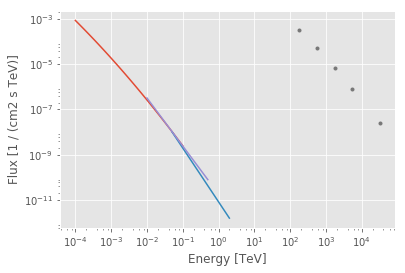

In [6]:
# Defining units
opts = dict(energy_unit='TeV', flux_unit='cm-2 s-1 TeV-1')

# Plot spectral models (expected data)
source_3fgl.spectral_model.plot(source_3fgl.energy_range, **opts)
source_2fhl.spectral_model.plot(source_2fhl.energy_range, **opts)
source_1fhl.spectral_model.plot(source_1fhl.energy_range, **opts)

# Plot reference point
# plt.plot(source_3fgl.spectral_model.parameters['reference'].value,
#          source_3fgl.spectral_model.parameters['amplitude'].value,
#         '*')

# Plot flux points data (actual data)
def plotActualData(data):
    return plt.errorbar(x=data['e_ref'],
             y = data['dnde'],
             yerr = data['dnde_err'],
             fmt='.'
            )

plotActualData(data_3fgl)

